<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)

#Implementation of different Gradient Descent Algorithms
In this notebook you will implement (i.e., train) a univariate Linear Regression model using:



1.   Batch Gradient Descent
2.   Stochastic Gradient Descent
3.   Mini-batch Gradient Descent



Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made  free for educational purposes. Nonetheless, the notebooks of this class should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  


###**Instructions:**
- You will be using Python 3.

- Only modify the code that is within the comments:

`### START CODE HERE ###`

`### END CODE HERE ###`

- You need to run all the code cells on the notebok sequentially
- If you are asked to change/update a cell, change/update and run it to check if your result is correct.


Before we begin, we need to import all libraries required for this programming exercise and get the data

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

#Pandas for summary statistics
import pandas as pd

#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression

#To check how long our implementation takes
import time


!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LRIntro/ex1data1.txt
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LRIntro/ex1data2.txt


--2025-02-10 23:24:04--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LRIntro/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt.3’

ex1data1.txt.3      100%[===================>]   1.33K  --.-KB/s    in 0s      

2025-02-10 23:24:04 (52.3 MB/s) - ‘ex1data1.txt.3’ saved [1359/1359]

--2025-02-10 23:24:04--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_LRIntro/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

You will use the same truck data as in the "Univariate_LR_implementation" notebook. The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`. We will also creare a matrix `X` with 1's in the 1st colums and the 2nd colums with the values of `x` for your vectorized implementation fo the algorithms.

In [ ]:
# Read comma separated data
data = np.loadtxt('ex1data1.txt', delimiter=',')
x, y = data[:, 0], data[:, 1]
x=x.reshape(x.size,1)
y=y.reshape(y.size,1)
m = y.size  # number of training

# Add a column of ones to X. The numpy function stack joins arrays along a given axis.
# The first axis (axis=0) refers to rows (training examples)
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), x[:,0]], axis=1)


#### 0- Computing the cost $J(\theta)$




As you perform gradient descent to  minimize the cost function $J(\theta)$,it is helpful to monitor the convergence by computing the cost. Now, we will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$.

In [ ]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n), where m is the number of examples,
        and n is the number of features. . We assume a vector of one's already
        appended to the features, so in the  univariate case n=1+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m x 1).

    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (2,1).

    Returns
    -------
    J : float
        The value of the regression cost function.

    Instructions
    ------------
    Compute the cost of a particular choice of theta.
    You should set J to the cost.
    """

    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0

    ### START CODE HERE ### (≈ 2 lines of code)




    ### END CODE HERE ###

    return J


#### 1- Batch Gradient descent

Next, you will complete a function which implements Batch Gradient Descent.

The starter code for the function `Batch_GD` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.
<br><br>


In [ ]:
def Batch_GD(X, y, theta, alpha, num_iters):
    """
    Performs a vectorized gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : arra_like
        Value at given features. A vector of shape (m x 1 ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1 x 1).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1 x 1 ).

    J_history : list
        A python list for the values of the cost function after each iteration.

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of
    the cost function (computeCost) and gradient.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions!!!
    theta_cb = theta.copy()

    J_history = [] # Use a python list to save cost in every iteration, you would need to append a new element for every step

    ### START CODE HERE ### (≈ 3 lines of code)





    ### END CODE HERE ###

     # save the cost J in every iteration

    return theta_cb, J_history

Now lets run your code:

In [ ]:
# initialize fitting parameters
theta = np.zeros(2).reshape(2,1)

# some gradient descent settings
iterations = 3000
alpha = 0.02

tic = time.process_time()
theta, J_history_BGD = Batch_GD(X ,y, theta, alpha, iterations)
toc = time.process_time()
print('Theta found by Batch_GD after {0} iterations: {1}, {2}'.format(iterations,theta[0,0],theta[1,0] ))
print("Cost value" ,computeCost(X, y, theta))
print("Time to run:"+str(1000*(toc - tic)) + "ms")

Theta found by Batch_GD after 3000 iterations: -3.895702578437695, 1.1930257781179299
Cost value 4.47697137653333
Time to run:73.84330500000003ms


**Expected output (approximately)**:



```
Theta found by Batch_GD after 3000 iterations:~ -3.89, 1.19
Cost value 4.47
```



Now lets plot $J(\theta)$:

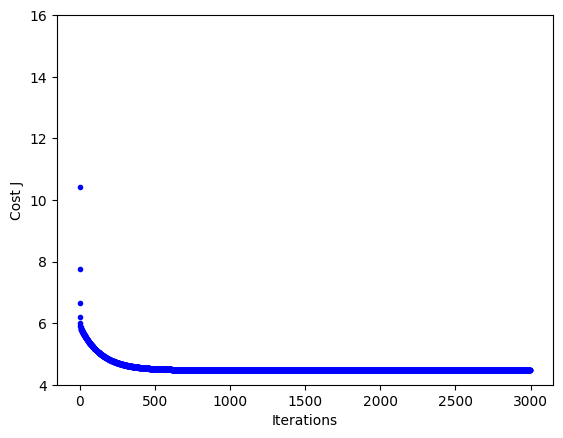

In [ ]:
# theta for minimized cost J
plt.plot(J_history_BGD, "b.")
plt.ylabel('Cost J')
plt.ylim(4,16)
plt.xlabel('Iterations');


#### 2- Stochastic Gradient descent

Next, you will complete a function which implements Stochastic Gradient Descent.

The starter code for the function `Stochastic_GD` calls `computeCost` on every iteration and saves the cost to a `python` list.



In [ ]:
t0, t1 = 1, 0  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)


def Stochastic_GD(X, y, theta,alpha, num_iters):
    """
    Performs a Stochastic gradient descent. Updates theta by taking `num_iters`
    Stochastic gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataStochasticset of shape (m x n+1).

    y : arra_like
        Value at given features. A vector of shape (m x 1 ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1 x 1).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1 x 1 ).

    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    np.random.seed(23)

    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions!!!
    theta_cs = theta.copy()
    theta_path_sgd=[]
    J_history=[]

    for it in range(num_iters):
        # Shuffle the training data at the beginning of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(m):
    ### START CODE HERE ### (≈ 4 lines of code)









    ### END CODE HERE ###
            # This is to ensure we pick the best we have found so far, not just the last one
        J_history.append(computeCost( X, y,theta_cs.reshape(2,1)))
        if(min(J_history)>=computeCost( X, y,theta_cs.reshape(2,1))):
            theta_min=theta_cs
    return theta_min,J_history

In [ ]:

# initialize fitting parameters
theta = np.zeros(shape=(2,1))

# some gradient descent settings
iterations = 100
alpha=0.05
tic = time.process_time()
theta,J_history_SGD = Stochastic_GD(X ,y,theta,alpha, iterations)
toc = time.process_time()
print('Theta found by Stochastic_GD after {0} iterations: {1}, {2}'.format(iterations,theta[0,0],theta[1,0] ))
print("Cost value" ,computeCost(X, y, theta))
print("Time to run:"+str(1000*(toc - tic)) + "ms")


Theta found by Stochastic_GD after 100 iterations: -2.2979782458133187, 1.0335170723885805
Cost value 4.709404337294954
Time to run:91.24398300000003ms


**Expected output (approximately)**:



```
Theta found by Stochastic_GD after 100 iterations: -2.24, 1.02
Cost value 4.72
```



Unfortunately, given this dataset of just 97 samples (m) and 2 features (n), we cannot appreciate the speed of SGD, even after using a different alpha. The key thing to look is at the plot below, see the “jumping”

Doing the `reshape` and finding the minimun value in the array is making this code run not as fast as ti should




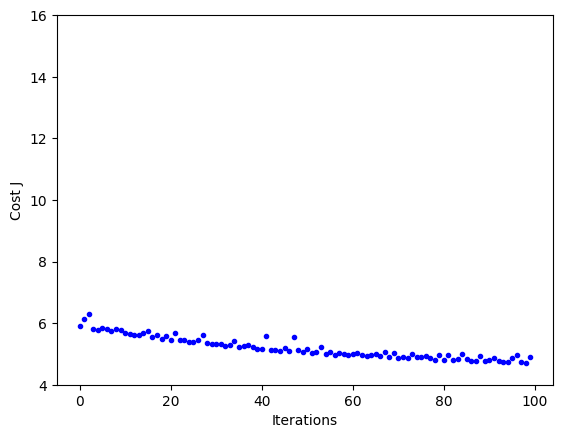

In [ ]:
# theta for minimized cost J
plt.plot(J_history_SGD, "b.")
# #plt.xlim(xmin=0.0)
plt.ylabel('Cost J')
plt.ylim(4,16)
plt.xlabel('Iterations');


#### 3- Mini-bacth Gradient descent

Next, you will complete a function which implements Mini-bacth Gradient Descent.



In [ ]:
def Minibacth_GD(X, y, theta,alpha, num_iters,minibatch_size):
    """
    Performs a Mini-bacth gradient descent. Updates theta by taking `num_iters`
    gradient steps from a set sample siz =minibatch_size
     with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataStochasticset of shape (m x n+1).

    y : arra_like
        Value at given features. A vector of shape (m x 1 ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1 x 1).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    minibatch_size: int
         Size of mini-batch

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1 x 1 ).

    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    np.random.seed(23)

    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions!!!
    theta_cm = theta.copy()

    J_history=[]

    for it in range(num_iters):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
    ### START CODE HERE ### (≈ 5 lines of code)









    ### END CODE HERE ###
        J_history.append(computeCost( X, y,theta_cm.reshape(2,1)))
        if(min(J_history)>=computeCost( X, y,theta_cm.reshape(2,1))):
            theta_min=theta_cm
    return theta_min,J_history

In [ ]:
np.random.seed(12)
# initialize fitting parameters
theta = np.zeros(shape=(2,1))

# some gradient descent settings
iterations = 100
alpha=0.1
minibatch_size=30

tic = time.process_time()
theta,J_history = Minibacth_GD(X ,y,theta,alpha, iterations,minibatch_size)
toc = time.process_time()
print('Theta found by Minibacth_GDwith batch of {0} and after {1} iterations: {2}, {3}'.format(minibatch_size,iterations,theta[0,0],theta[1,0] ))
print("Cost value" ,computeCost(X, y, theta))
print("Time to run:"+str(1000*(toc - tic)) + "ms")


Theta found by Minibacth_GDwith batch of 30 and after 100 iterations: -0.1524180455861156, 0.8178331768902602
Cost value 5.7526571427401665
Time to run:11.150950000000215ms


**Expected output (approximately)**:



```
Theta found by Minibacth_GDwith batch of 30 and after 100 iterations: -3.01, 1.10
Cost value 4.54
```



Doing the `reshape` and finding the minimun value in the array is making this codes run not as fast as it should

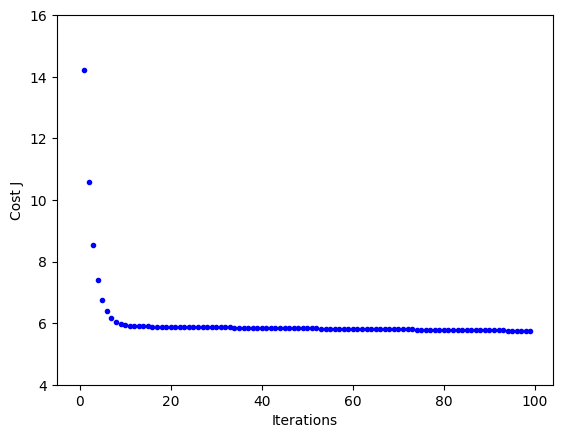

In [ ]:
# theta for minimized cost J
plt.plot(J_history, "b.")
plt.ylim(4,16)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

###Now let's visualize our results

In [ ]:
xx = np.arange(5,24)
theta = np.zeros(2).reshape(2,1)

#Batch_GD
iterations = 3000
alpha = 0.01
theta_Batch_GD, J_history = Batch_GD(X ,y, theta, alpha, iterations)
yy_Batch_GD = theta_Batch_GD[0]+theta_Batch_GD[1]*xx

#Stochastic_GD
iterations = 100
alpha=0.01
theta_Stochastic_GD,J_history = Stochastic_GD(X ,y,theta,alpha, iterations)
yy_Stochastic_GD = theta_Stochastic_GD[0]+theta_Stochastic_GD[1]*xx


#Minibacth_GD
iterations = 100
alpha=0.01
minibatch_size=30
theta_Minibacth_GD,J_history = Minibacth_GD(X ,y,theta,alpha, iterations,minibatch_size)
yy_Minibacth_GD = theta_Minibacth_GD[0]+theta_Minibacth_GD[1]*xx

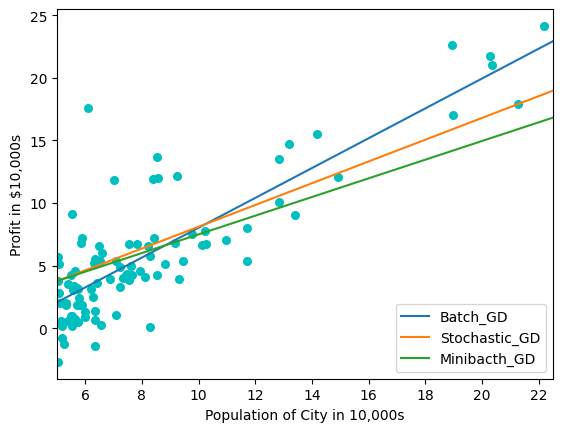

In [ ]:
# Plot gradient descent

plt.scatter(X[:,1], y, s=30, c='c', marker='o', linewidths=1)
plt.plot(xx,yy_Batch_GD, label='Batch_GD')
plt.plot(xx,yy_Stochastic_GD, label='Stochastic_GD')
plt.plot(xx,yy_Minibacth_GD, label='Minibacth_GD')
plt.rcParams['figure.figsize'] = [10, 5]

plt.xlim(5,22.5)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

## Training on a Synthetic dataset

Lets create our own dataset with m=1,000

Text(0.5, 0, 'x')

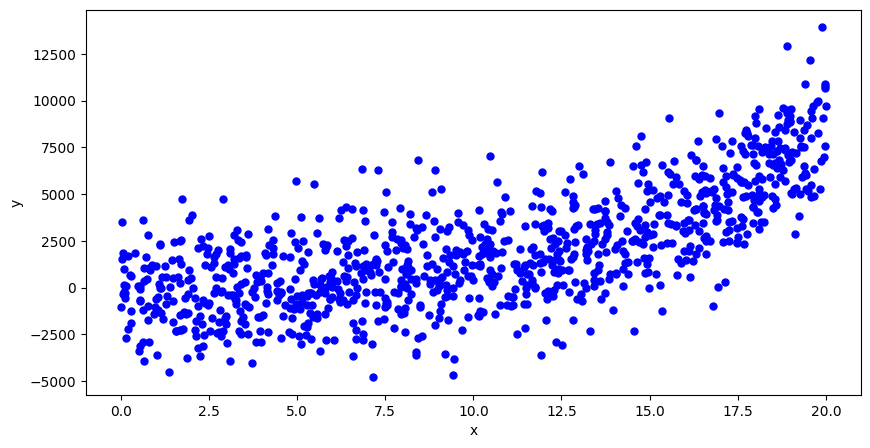

In [ ]:
m=1000
np.random.seed(12)
x_synthetic = 20 * np.random.rand(m,1)
y_synthetic = 5 + 5* x_synthetic+ x_synthetic**3 + 2*m*np.random.randn(m, 1)
plt.plot(x_synthetic, y_synthetic, 'ob', ms=5)
plt.ylabel('y')
plt.xlabel('x')

Lets implement our algorithms (this might take a few minutes)

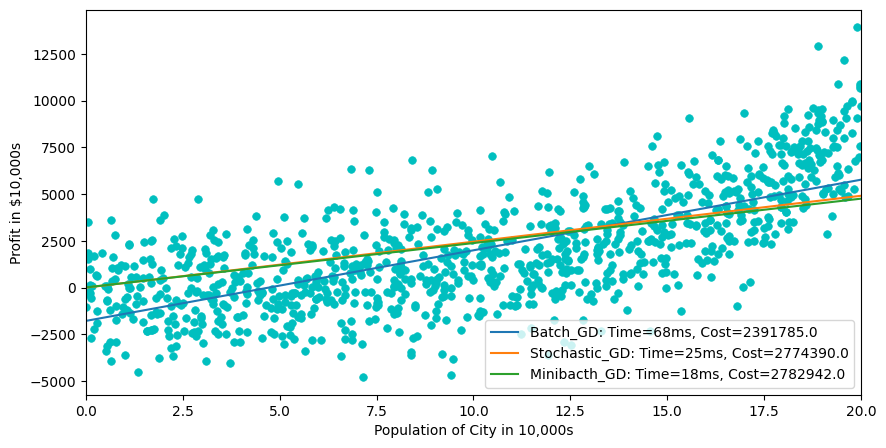

In [ ]:
X_synthetic = np.stack([np.ones(m), x_synthetic[:,0]], axis=1)
np.random.seed(12)
xx = np.arange(0,24)
theta = np.zeros(2).reshape(2,1)

#Batch_GD
iterations = 3000
alpha = 0.01
tic = time.process_time()
theta_Batch_GD, J_history = Batch_GD(X_synthetic ,y_synthetic, theta, alpha, iterations)
toc = time.process_time()
Batch_GD_time=(1000*(toc - tic))
yy_Batch_GD = theta_Batch_GD[0]+theta_Batch_GD[1]*xx
Batch_GD_cost=computeCost(X_synthetic, y_synthetic, theta_Batch_GD)


#Stochastic_GD
iterations = 5
alpha=0.01
tic = time.process_time()
theta_Stochastic_GD,J_history = Stochastic_GD(X_synthetic ,y_synthetic,theta,alpha, iterations)
toc = time.process_time()
Stochastic_GD_time=(1000*(toc - tic))
yy_Stochastic_GD = theta_Stochastic_GD[0]+theta_Stochastic_GD[1]*xx
Stochastic_GD_cost=computeCost(X_synthetic, y_synthetic, theta_Stochastic_GD)

#Minibacth_GD
iterations = 50
alpha=0.01
minibatch_size=20
tic = time.process_time()
theta_Minibacth_GD,J_history = Minibacth_GD(X_synthetic ,y_synthetic,theta,alpha, iterations,minibatch_size)
toc = time.process_time()
Minibacth_GD_time=(1000*(toc - tic))
yy_Minibacth_GD = theta_Minibacth_GD[0]+theta_Minibacth_GD[1]*xx
Minibacth_GD_cost=computeCost(X_synthetic, y_synthetic, theta_Minibacth_GD)

# Plot gradient descent

plt.scatter(X_synthetic[:,1], y_synthetic, s=30, c='c', marker='o', linewidths=0.5)
plt.plot(xx,yy_Batch_GD, label='Batch_GD: Time={}ms, Cost={}'.format(round(Batch_GD_time),round(Batch_GD_cost,0)))
plt.plot(xx,yy_Stochastic_GD, label='Stochastic_GD: Time={}ms, Cost={}'.format(round(Stochastic_GD_time),round(Stochastic_GD_cost,0)))
plt.plot(xx,yy_Minibacth_GD, label='Minibacth_GD: Time={}ms, Cost={}'.format(round(Minibacth_GD_time),round(Minibacth_GD_cost,0)))
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim(0,20)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

**Expected output (approximately)**:

```
Batch_GD:       2391785
Stochastic_GD:  2774339
Minibatch_GD:   2782942
```



**DO NOT DELETE NOR MODIFY THESE CODE CELLS**


